In [22]:
from langgraph.graph import StateGraph,START,END

In [12]:
from typing import TypedDict

In [13]:
class BMI_STATE(TypedDict):
    height: float
    weight: float
    bmi: float
    category: str
    

In [14]:
def claculater_bmi(state:BMI_STATE)->BMI_STATE:
    height_in_meters= state['height']/100
    bmi= state['weight']/(height_in_meters**2)
    state['bmi']=round(bmi,2)
    return state

In [15]:
def lable(state:BMI_STATE) -> BMI_STATE:
    bmi= state['bmi']
    if bmi <18.5:
        state['category']='Underweight'
    elif 18.5 <= bmi <24.9:
        state['category']='Normal weight'
    elif 25 <= bmi <29.9:
        state['category']='Overweight'
    else:
        state['category']='Obesity'
    return state

In [23]:
#Define the graph
bmigraph= StateGraph(BMI_STATE)

#ADD THE NODE
bmigraph.add_node('cal',claculater_bmi)
bmigraph.add_node('lable',lable)

#Add EDGE
bmigraph.add_edge(START,'cal')
bmigraph.add_edge('cal','lable')
bmigraph.add_edge('lable',END)

#
workflows=bmigraph.compile()

In [28]:
initial_state={'weight':80,'height':1.73}
final_state=workflows.invoke(initial_state)

print(final_state)

{'height': 1.73, 'weight': 80, 'bmi': 267299.27, 'category': 'Obesity'}


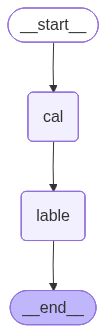

In [29]:
from IPython.display import Image
Image(workflows.get_graph().draw_mermaid_png())